<a href="https://colab.research.google.com/github/kigit2017/bankProject/blob/main/bankMarketingProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [67]:
data = pd.read_csv('/content/bank_marketing_dataset.csv')
data.shape

(41188, 21)

In [68]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


age: integer -age of a person - no nulls
job :object - job type - np nulls
marital :object - maried/unmarried - no nulls
education : object- education qualification - no nulls
default : object
housing object - yes/no - no nulls
loan - yes/no - no nulls
contact - object - "telephone"-not null
month - object - name of month - not null
day_of_week - object - (mon - Sun) not null
duration - int64
campaign - int64
pdays - int64
previous - int64
poutcome- object
emp.var.rate - float64
cons.price.idx - float64
cons.conf.idx - float64
euribor3m       - float
nr.employed      -float
subscribed       -object


1.   List item

1.   List item
2.   List item


2.   List item



In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There are no missing values in the data. Y column is subscribed

In [70]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [71]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [72]:
data.rename(columns={'subscribed':'y'}, inplace = True)

In [73]:
df = data.groupby(['y'])

In [74]:
yes_group = df.get_group('yes')
no_group = df.get_group('no')

In [75]:
yes_group.count()

age               4640
job               4640
marital           4640
education         4640
default           4640
housing           4640
loan              4640
contact           4640
month             4640
day_of_week       4640
duration          4640
campaign          4640
pdays             4640
previous          4640
poutcome          4640
emp.var.rate      4640
cons.price.idx    4640
cons.conf.idx     4640
euribor3m         4640
nr.employed       4640
y                 4640
dtype: int64

In [76]:
no_group.count()

age               36548
job               36548
marital           36548
education         36548
default           36548
housing           36548
loan              36548
contact           36548
month             36548
day_of_week       36548
duration          36548
campaign          36548
pdays             36548
previous          36548
poutcome          36548
emp.var.rate      36548
cons.price.idx    36548
cons.conf.idx     36548
euribor3m         36548
nr.employed       36548
y                 36548
dtype: int64

In [77]:
data.groupby(['y']).size()

y
no     36548
yes     4640
dtype: int64

"Admin" job types(10422) is the highest who apply for  loans. "Unemployed" (1014) being the least. 330 unknown job types.

In [78]:
data.groupby(['job']).size()

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64

"Married" count is highest for loan application and the lowest is "divorced" group

In [79]:
data.groupby(['marital']).size()

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

More People with university degree has applied for loans.

In [80]:
data.groupby(['education']).size()

education
basic.4y                4176
basic.6y                2292
basic.9y                6045
high.school             9515
illiterate                18
professional.course     5243
university.degree      12168
unknown                 1731
dtype: int64

In [81]:
def barplots(x,y,hue):
  plt.figure(figsize=(15,8))
  sns.set_palette('husl')
  sns.barplot(x=x,y=y,data=loan_pur)
  plt.legend()

Frequency of loan purchase with age.

In [82]:
loan_pur = data[data['loan']=='yes'] .groupby('age').count()

#loan_pur = loan_pur.groupby(loan_pur['age']).count()
#loan_pur.columns

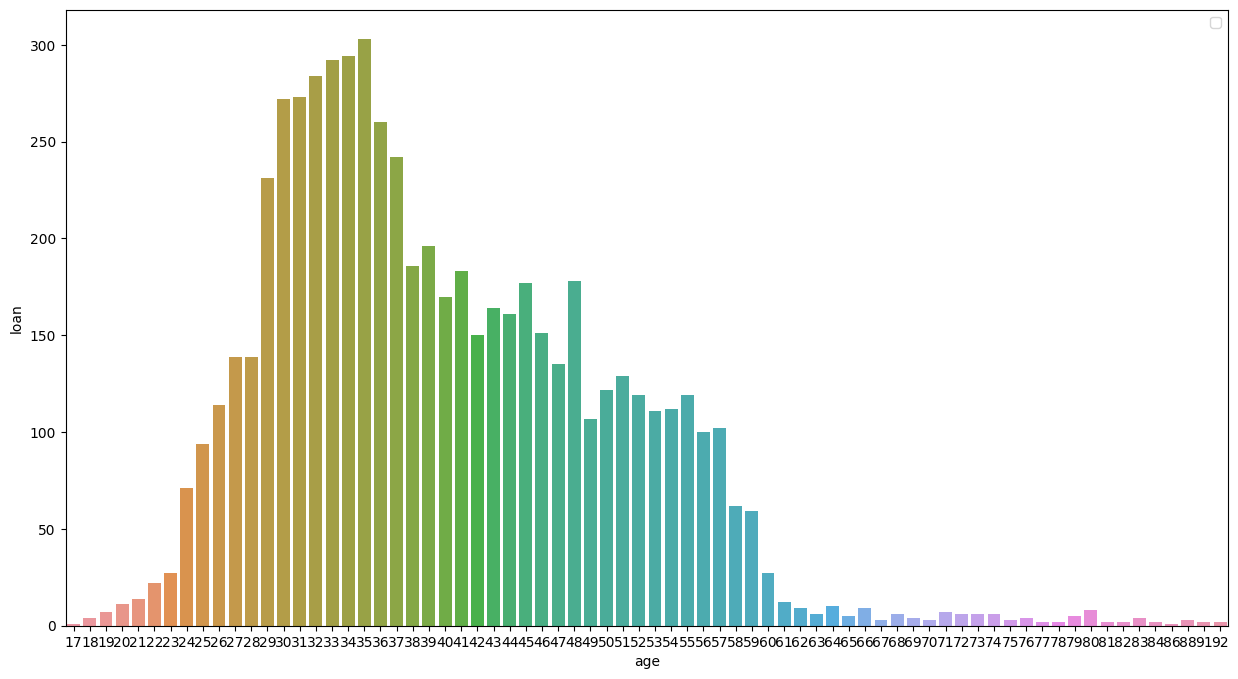

In [83]:
barplots(loan_pur.index,loan_pur['loan'],loan_pur['y'])


In [94]:
#loan_pur['age'].plot.bar(stacked=True,figsize=(16,9))

Frequency of Loan purchased with marital status.

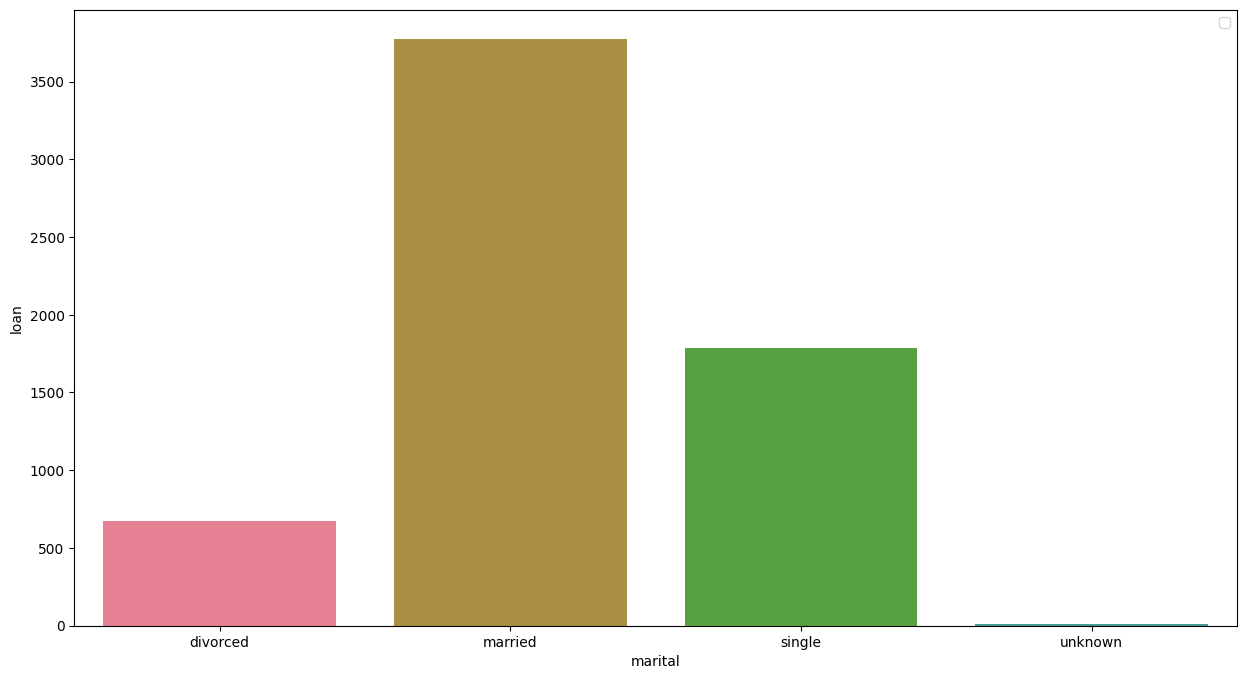

In [95]:
loan_pur = data[data['loan']=='yes'] .groupby('marital').count()
barplots(loan_pur.index,loan_pur['loan'],loan_pur['y'])

**Histogram for age column**

Histogram for age(frequency of age with itself) data shows
1.   Data distribution. Data is distriuted into classes or groups.There are gaps in the data (-.25 - 0.0).
2.   Frequency of occurences of each bin.Bins are of same size.



In [ ]:
x=data['age']
y1 = (((x - 30) ** 30 ) - 1000) + np.random.randint(-20, 20, size=len(x))#age data between 0 to 100,scaled data to 1000
plt.hist(y1)
plt.xlabel('AGE')
plt.ylabel('Frequency of Age')
plt.show()